# PD1 - EDA
#### Jakub Lis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('../students.csv')

Zbiór pochodzi ze strony https://www.kaggle.com/uciml/student-alcohol-consumption, gdzie każda kolumna została opisana. W skrócie mamy do czeynienia z danymi opisujących uczniów i ich semestralnymi i końcowymi ocenami.

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


Dane zawierają 1044 wierszy i 34 kolumny, przy czym nie mamy w tych danych żadnych braków, co potwierdza wydruk poniżej.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Na początku warto przyjrzeć się podstawowym danym statystycznym opisującym każdą z kolumn. Wówczas można na przykład wyłapać zastępowanie braków danymi absurdalnie dużymi wartościami lub wartościami ujemnymi, gdy zmienna powinna być dodatnia. Oprócz tego widzimy jak się układają wartości w kolumnach.

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Rzeczywiście, w kolumnach numerycznych nie zauważamy tych braków :)

Wyplotujmy histogramy dla zmiennych numerycznych.

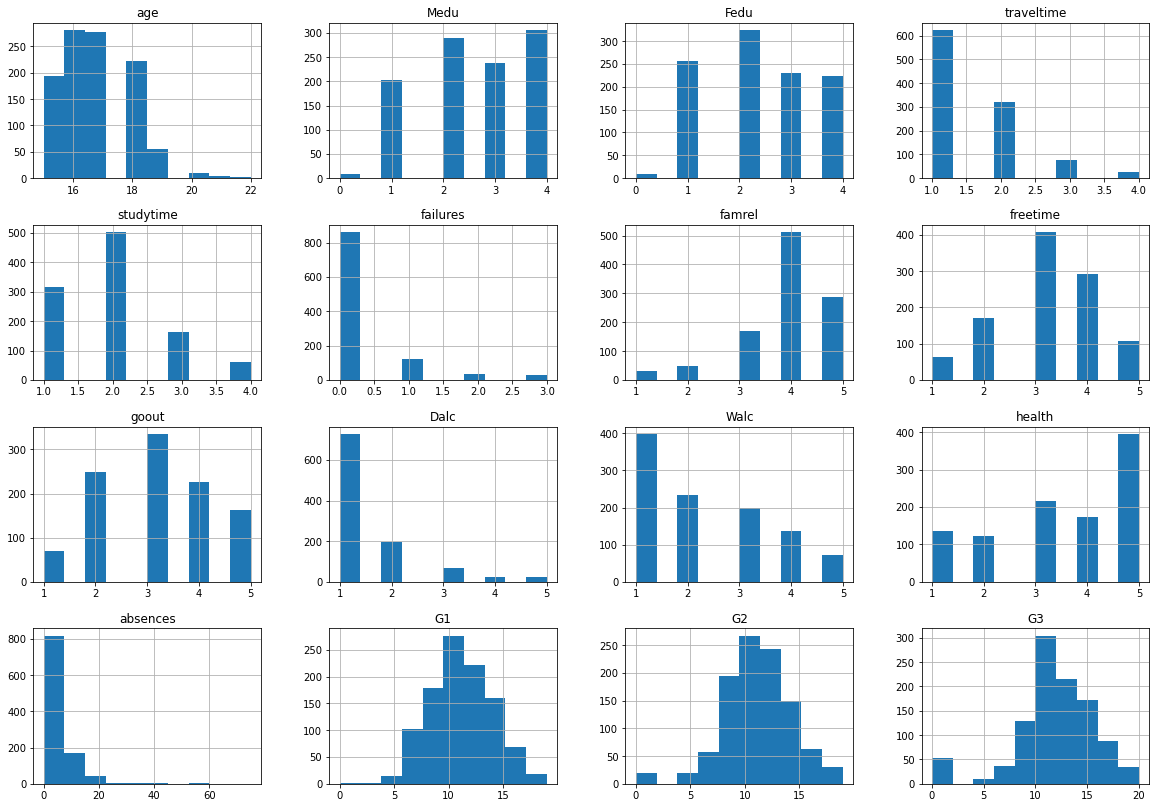

In [6]:
data.hist(bins = 10, figsize = (20, 14))
plt.show()

* Widzimy, że oceny G1, G2, G3 rozkładają się w miarę symetrycznie
* Absences jest skumulowane przy zerze i wykres jest skośny
* Podobnie jak w przypadku absences, mamy dla zmiennych failures i Dalc

Dla kolumn kategorycznych stworzymy countploty, aby móc zobaczyć jaką frakcję stanowi dana wartość pośród wszystkich wierszy.

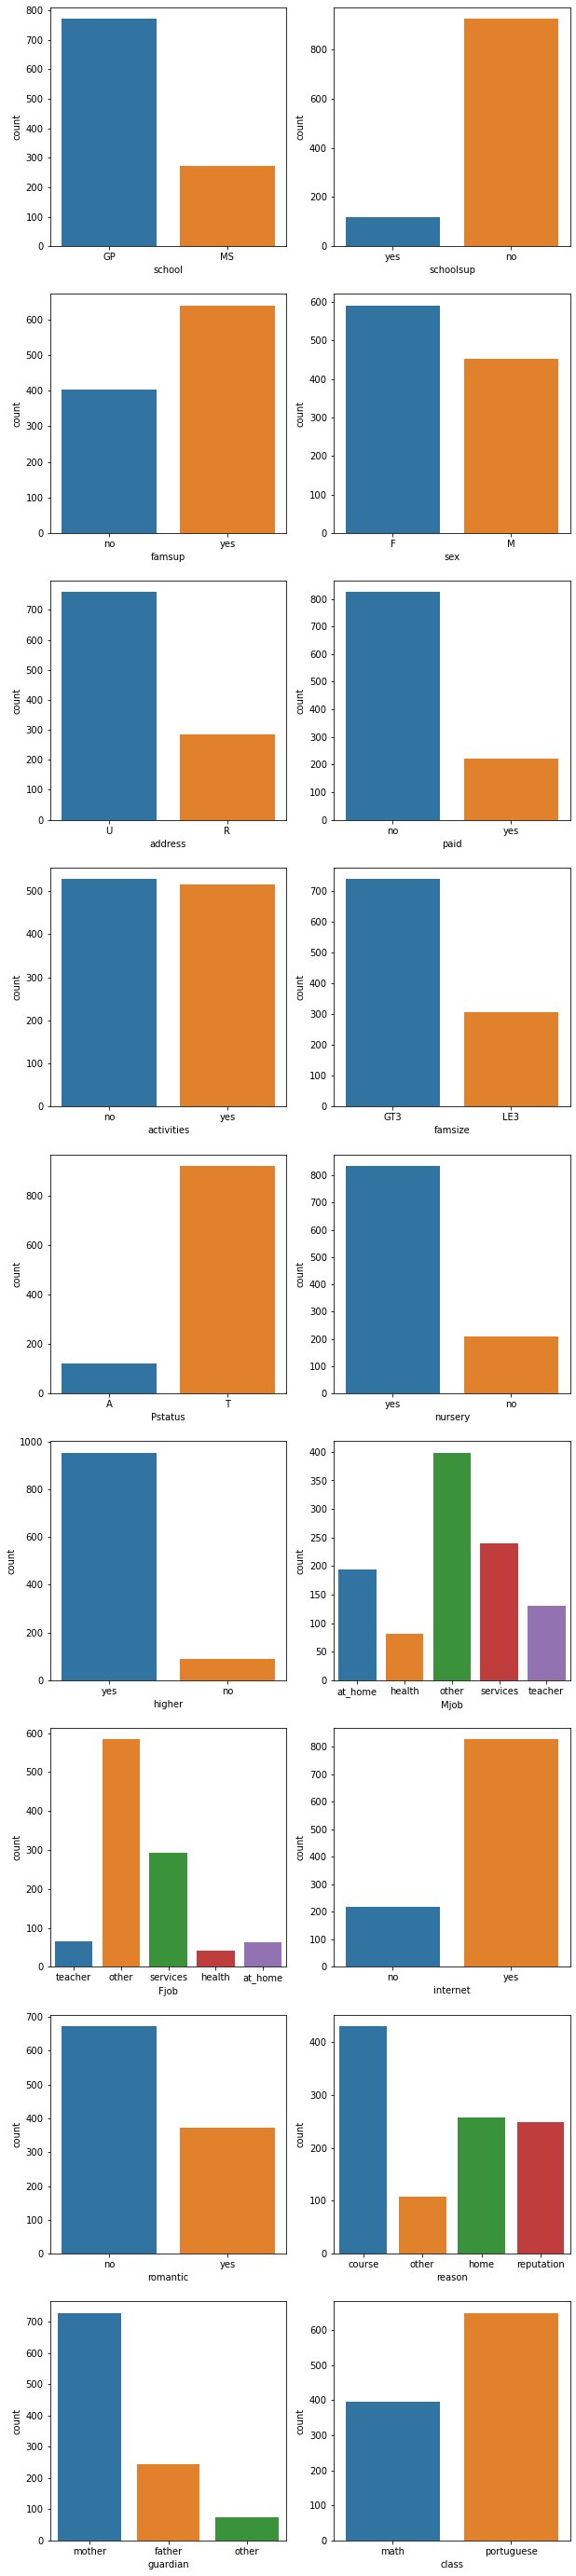

In [7]:
fig, ax = plt.subplots(9,2)
fig.set_size_inches(10, 50)

for i, column in enumerate(data.select_dtypes([object]).columns):
    sns.countplot(x = data[column], ax = ax[i%9][i%2])
    
plt.show()

Widzimy, że najbardziej zrównoważoną kolumną jest **activities**, oznaczająca, czy dana osoba ma jakieś zajęcia pozalekcyjne. Najmniej zbalansowane są za to **higher**, **Pstatus** oraz **schoolsup** (oznaczające kolejno: czy dana osoba chce podjąć studia wyższe, czy jej rodzice mieszkają razem, oraz czy dana osoba ma dodatkowe wsparcie w edukacji)

# Korelacje między zmiennymi

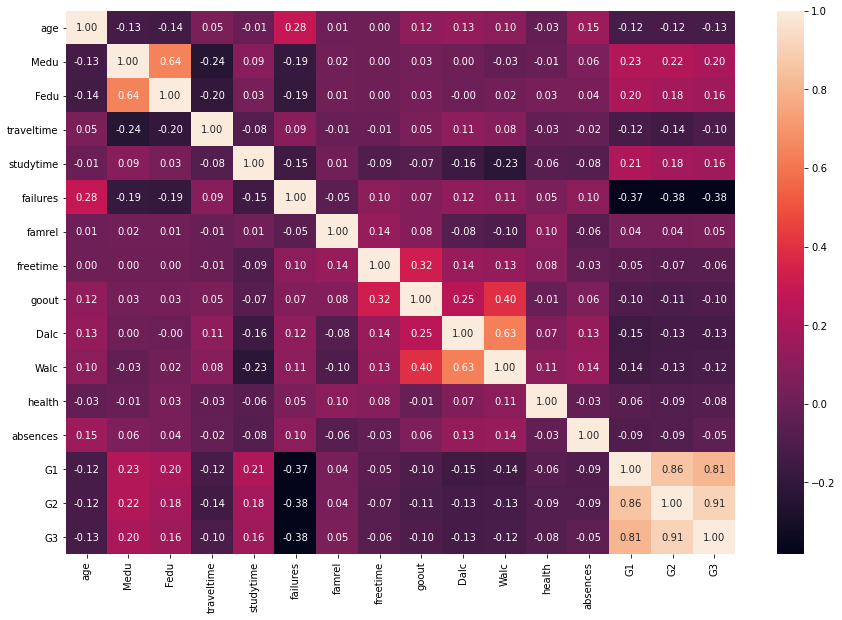

In [8]:
plt.figure(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".2f")
plt.show()

Najsilniejsza korelacja z ocenami G1, G2, G3 (poza korelacjami między nimi samymi) występuje ze zmienną **failures**, która oznacza liczbę niezdanych klas. Ponadto istnieje w miarę silna korelacja między parami zmiennych **Dalc** i **Walc** oraz między **Medu** i **Fedu**.

Podejrzyjmy więc jak wygląda korelacja failures z oceną G3.

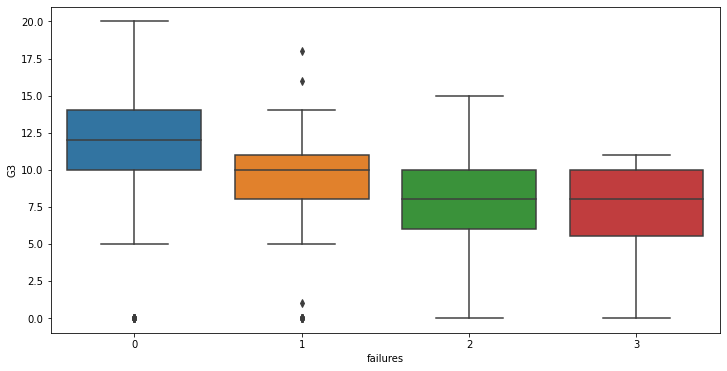

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x = "failures", y = "G3")
plt.show()

Widzimy taką zależność, że przy większej liczbie niezdanych klas ocena G3 jest przeważnie gorsza. Stąd też ujemna wartość tej korelacji.

Korelację zmiennych Medu i Fedu, tzn. edukację odpowiednio matki i ojca danej osoby (większa wartość oznacza wyższy poziom edukacji) możemy zobrazować za pomocą tabeli kontyngencji.

In [10]:
pd.crosstab(data['Medu'], data['Fedu'])

Fedu,0,1,2,3,4
Medu,,,,,
0,1,3,5,0,0
1,6,129,51,13,3
2,0,80,152,42,15
3,0,35,70,92,41
4,2,9,46,84,165


Rzeczywiście największe wartości pojawiają się na diagonali, widzimy więc ~liniową zależność poziomu wykształcenia jednego z rodziców od drugiego.